# Compute performance metrics for the given Y and Y_score without sklearn

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [249]:
# let's import the data
data = pd.read_csv('5_a.csv')

In [250]:
# let's see the header of the data
data.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


**calculate confusion_matrix**

In [251]:
def custom_confusion_matrix(data):
    y_actual = list(data.iloc[:,0])
    y_predicted = list(data.iloc[:,1])
    
    
    # lets binarize y_predicted with threshold 0.5.
    # means >=0.5 is 1 otherwise 0
    y_actual = list(map(int ,y_actual))
    y_predicted = [0 if i<0.5 else 1 for i in y_predicted]
    
    confusion_matrix = [
                        [0,0],
                        [0,0]
                    ]
    #let's calculate every part of confusion matrix
    # TrueNegative(TN), FalseNegative(FN), TruePositive(TP),FalsePositive(FP)
    tn,fn,tp,fp = 0,0,0,0
    for i in range(len(y_actual)):
        
        
        if y_actual[i]==0 and y_predicted[i] ==0:
            tn +=1
        elif y_actual[i]==0 and y_predicted[i] ==1:
            fp +=1
        elif y_actual[i]==1 and y_predicted[i] ==1:
            tp +=1
        elif y_actual[i]==1 and y_predicted[i]==0:
            fn +=1
    
    confusion_matrix[0][0] = tn
    confusion_matrix[0][1] = fp
    confusion_matrix[1][0] = fn
    confusion_matrix[1][1] = tp
    
    return np.array(confusion_matrix)

In [252]:
custom_confusion_matrix(data)

array([[    0,   100],
       [    0, 10000]])

**calculate f1-score**

In [253]:
def f1_score(data):
    y_actual = list(data.iloc[:,0])
    y_predicted = list(data.iloc[:,1])
    
    
    # lets binarize y_predicted with threshold 0.5.
    # means >=0.5 is 1 otherwise 0
    y_actual = list(map(int ,y_actual))
    y_predicted = [0 if i<0.5 else 1 for i in y_predicted]
    

    #let's calculate every part of confusion matrix
    # TrueNegative(TN), FalseNegative(FN), TruePositive(TP),FalsePositive(FP)
    tn,fn,tp,fp = 0,0,0,0
    for i in range(len(y_actual)):
        
        
        if y_actual[i]==0 and y_predicted[i] ==0:
            tn +=1
        elif y_actual[i]==0 and y_predicted[i] ==1:
            fp +=1
        elif y_actual[i]==1 and y_predicted[i] ==1:
            tp +=1
        elif y_actual[i]==1 and y_predicted[i]==0:
            fn +=1
    
    precision = tp/(tp+fp)
    recall    = tp/(tp+fn)
    
    f1_score = 2*((precision * recall)/(precision+recall))
    return f1_score

In [254]:
f1_score(data)

0.9950248756218906

**calculate accuracy_score**

In [255]:
def custom_accuracy_score(data):
    y_actual = list(data.iloc[:,0])
    y_predicted = list(data.iloc[:,1])
    
    
    # lets binarize y_predicted with threshold 0.5.
    # means >=0.5 is 1 otherwise 0
    y_actual = list(map(int ,y_actual))
    y_predicted = [0 if i<0.5 else 1 for i in y_predicted]
    
    #let's calculate every part of confusion matrix
    # TrueNegative(TN), FalseNegative(FN), TruePositive(TP),FalsePositive(FP)
    tn,fn,tp,fp = 0,0,0,0
    for i in range(len(y_actual)):
        
        
        if y_actual[i]==0 and y_predicted[i] ==0:
            tn +=1
        elif y_actual[i]==0 and y_predicted[i] ==1:
            fp +=1
        elif y_actual[i]==1 and y_predicted[i] ==1:
            tp +=1
        elif y_actual[i]==1 and y_predicted[i]==0:
            fn +=1
            
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    return accuracy

In [256]:
custom_accuracy_score(data)

0.9900990099009901

In [261]:
def custom_auc_score(data):
    ##### It might take few minutes to compute AUC Score ########

    y_actual = list(data.iloc[:,0])
    y_predict = list(data.iloc[:,1])


    # lets binarize y_predicted with threshold 0.5.
    # means >=0.5 is 1 otherwise 0
    y_actual = list(map(int ,y_actual))

    #let's initialize every part of confusion matrix
    # TrueNegative(TN), FalseNegative(FN), TruePositive(TP),FalsePositive(FP)
    tn,fn,tp,fp = 0,0,0,0


    # let's find n unique probabilities
    y_predict = np.array(data.iloc[:,1]) # changing to numpy.array
    threshold   = np.unique(y_predict)#finding unique values
    threshold.sort()# sort the probabilities in ascending order

    #for every probabilities in threshold
    fpr_values = []
    tpr_values = []
    for thresh in threshold:# make every probability as threshold
        tn,fn,tp,fp = 0,0,0,0
        # for every threshold value change the y_predicted
        y_predicted = [0 if i<thresh else 1 for i in y_predict]

        #let's calculate every part of confusion matrix
        # TrueNegative(TN), FalseNegative(FN), TruePositive(TP),FalsePositive(FP)
        for i in range(len(y_actual)):
            if y_actual[i]==0 and y_predicted[i] ==0:
                tn +=1
            elif y_actual[i]==0 and y_predicted[i] ==1:
                fp +=1
            elif y_actual[i]==1 and y_predicted[i] ==1:
                tp +=1
            elif y_actual[i]==1 and y_predicted[i]==0:
                fn +=1

        # find tpr and fpr for every threshold
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    # change tpr_values and fpr_values to numpy array
    tpr_array = np.array(tpr_values)
    fpr_array = np.array(fpr_values)
    
    # finding auc score
    auc_score = abs(np.trapz(tpr_array, fpr_array))
    
    # plotting
    plt.plot(fpr_array,tpr_array)
    plt.xlabel('FPR(False Positive Rate)')
    plt.ylabel('TPR(True Positive Rate)')
    plt.show()
    
    return auc_score# returning AUC Score, (tpr and fpr) for testing purpose

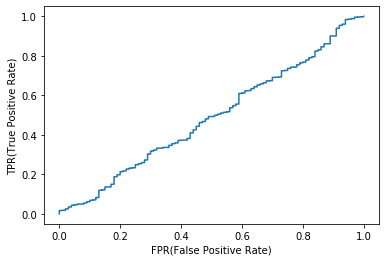

0.48829900000000004

In [262]:
custom_auc_score(data) # It might take few minutes

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [263]:
# importing the dataset 5_b.csv
data_b = pd.read_csv('5_b.csv')

In [264]:
# see the header of data_b
data_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


**1.Compute Confusion matrix**

In [265]:
confusion_matrix = custom_confusion_matrix(data_b)
confusion_matrix

array([[9761,  239],
       [  45,   55]])

**2.f1-score**

In [266]:
f1_score(data_b)

0.2791878172588833

**3.accuracy_score**

In [267]:
custom_accuracy_score(data_b)

0.9718811881188119

**4. auc score**

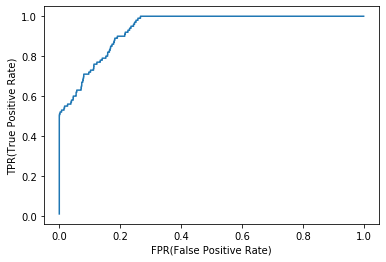

0.937757

In [268]:
custom_auc_score(data_b)

In [230]:
# write your code

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [231]:
# import the dataset 5_c.csv
data_c = pd.read_csv('5_c.csv')

In [232]:
# header of the dataset
data_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [273]:
# creating optimal_threshold method to find best threshold value for given equation.
def optimal_threshold(data):
    y_actual = list(data.iloc[:,0])
    y_predict = list(data.iloc[:,1])


    y_actual = list(map(int ,y_actual))

    #let's initialize 
    #, FalseNegative(FN),FalsePositive(FP)
    fn,fp = 0,0


    # let's find n unique probabilities
    y_predict = np.array(data.iloc[:,1]) # changing to numpy.array
    threshold   = np.unique(y_predict)#finding unique values
    threshold.sort()# sort the probabilities(threshold values) in ascending order
    
    # initializing A to store the result of given equation
    A = []
    
    for thresh in threshold:# make every probability as threshold
        fn,fp = 0,0
        # for every threshold value change the y_predicted
        y_predicted = [0 if i<thresh else 1 for i in y_predict]

        #let's calculate
        # FalseNegative(FN),FalsePositive(FP)
        for i in range(len(y_actual)):
            if y_actual[i]==0 and y_predicted[i] ==1:
                fp +=1
            elif y_actual[i]==1 and y_predicted[i]==0:
                fn +=1
        
        # let's compute A= (500*no.of false negative) + (100*no.of false positive)
        A.append((500*fn+100*fp,thresh)) # appending the value of A every threshold


#     result = list(zip(list(A),list(threshold)))
    A.sort()
    return A[0][1] # returning best threshold value

In [274]:
best_value = optimal_threshold(data_c)
best_value

0.2300390278970873

**I am not getting the threshold that you said in the comments. Please point out where I am doing mistake**

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [237]:
# loading the dataset
data_d = pd.read_csv('5_d.csv')

In [238]:
# header of the dataset
data_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


**1. Mean Squared Error**

In [239]:
def mean_squared_error(data):
    
    y_actual = data.iloc[:,0]
    y_predicted = data.iloc[:,1]
    
    error = 0
    
    for i in range(len(y_actual)):
        error += (y_actual[i]-y_predicted[i])**2
        
    result= error/len(y_actual)
    return result

In [240]:
mean_squared_error(data_d)

177.16569974554707

**2. Mean Absolute Percentage Error**

In [241]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(data):
    y_actual = np.array(data_d.iloc[:,0])
    y_predicted = np.array(data_d.iloc[:,1])
    error_u = 0
    error_l = 0 
    for i in range(len(y_actual)):
        error_u += np.abs((y_actual[i]-y_predicted[i]))# absolute sum of all error 
        error_l += y_actual[i] # sum of all actual y

    result= error_u/error_l
    return result*100

In [242]:
mean_absolute_percentage_error(data_d)

12.91202994009687

**3. R^2 Error**

In [243]:
def mean_squared_error(data):
    y_actual = np.array(data_d.iloc[:,0])
    y_predicted = np.array(data_d.iloc[:,1])
    
    y_mean = np.mean(y_actual)
    
    ss_total = 0
    ss_residual = 0
    
    for i in range(len(y_actual)):
        ss_total+= (y_actual[i]-y_mean)**2
        ss_residual+= (y_actual[i]-y_predicted[i])**2
        
    r2 = 1-(ss_residual/ss_total)
    return r2

In [244]:
mean_squared_error(data_d)

0.9563582786990964

<font face='Segoe UI'>
    <h3>Let's compare the result with sklearn.metrics's r2_score

In [245]:
y_actual = np.array(data_d.iloc[:,0])
y_predicted = np.array(data_d.iloc[:,1])

In [246]:
from sklearn.metrics import r2_score

In [247]:
r2_score(y_actual,y_predicted)

0.9563582786990937